author: arena-grom

# Spatial Data Visualization

## Imaging of Gaussian discs

Importing necessary libraries.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### 2D Gaussian disc

Creating Gaussian disc (10x15) for calculations and visualizations. Copied how to create a Gaussian disc from: https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-79.php. Another site that explains Gaussian maths https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/.

The cell value at x=3 and y=5 has been highlighted and printed out below.

In [10]:
x, y = np.meshgrid(np.linspace(-1,1,15), np.linspace(-1,1,10))
d = np.sqrt(x*x+y*y)
sigma, mu = .7, .0
gd = 8*np.exp(-((d-mu)**2 / ( 2.0 * sigma**2 ) ))

print(f'2D Gaussian-like array:\n{np.round(gd,1)}')
print(f'\nCell value at [3,5]: {round(gd[3,5], 1)}')

2D Gaussian-like array:
[[1.  1.4 1.7 2.1 2.4 2.7 2.8 2.9 2.8 2.7 2.4 2.1 1.7 1.4 1. ]
 [1.6 2.  2.6 3.1 3.6 4.  4.2 4.3 4.2 4.  3.6 3.1 2.6 2.  1.6]
 [2.1 2.8 3.5 4.2 4.8 5.4 5.7 5.8 5.7 5.4 4.8 4.2 3.5 2.8 2.1]
 [2.6 3.4 4.2 5.1 5.9 6.6 7.  7.1 7.  6.6 5.9 5.1 4.2 3.4 2.6]
 [2.8 3.7 4.7 5.7 6.5 7.3 7.7 7.9 7.7 7.3 6.5 5.7 4.7 3.7 2.8]
 [2.8 3.7 4.7 5.7 6.5 7.3 7.7 7.9 7.7 7.3 6.5 5.7 4.7 3.7 2.8]
 [2.6 3.4 4.2 5.1 5.9 6.6 7.  7.1 7.  6.6 5.9 5.1 4.2 3.4 2.6]
 [2.1 2.8 3.5 4.2 4.8 5.4 5.7 5.8 5.7 5.4 4.8 4.2 3.5 2.8 2.1]
 [1.6 2.  2.6 3.1 3.6 4.  4.2 4.3 4.2 4.  3.6 3.1 2.6 2.  1.6]
 [1.  1.4 1.7 2.1 2.4 2.7 2.8 2.9 2.8 2.7 2.4 2.1 1.7 1.4 1. ]]

Cell value at [3,5]: 6.6


Imaging of the 2D Gaussian disc using Seaborn.

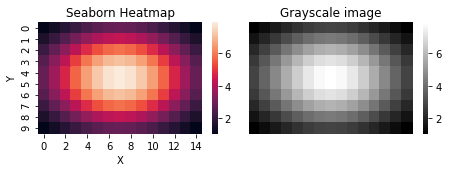

In [11]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(6.5,2.5))

plot1 = sns.heatmap(gd, ax=ax0)
plot1.set_title('Seaborn Heatmap')
plot1.set_xlabel('X')
plot1.set_ylabel('Y')

plot2 = sns.heatmap(gd, cmap='gray', ax=ax1)
plot2.set_title('Grayscale image')
plot2.set_axis_off()

plt.tight_layout()
plt.show()

### 3D channel Gaussian disc (RGB imaging)

To visualize channels, a new thinner 3 channel Gaussian disc (RGB image) was created using numpy. The 2D was duplicated and rolled according to Part#2 and https://stackoverflow.com/questions/40119743/convert-a-grayscale-image-to-a-3-channel-image. Red, Green and Blue Gaussians do not overlap and can be plotted separately (Answering Q1).

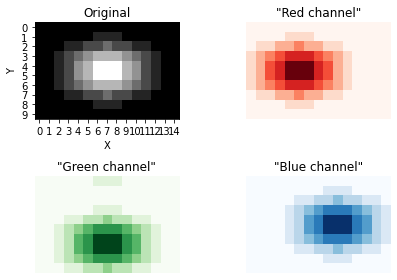

In [12]:
sigma = .4 # changing sigma
gd = 8*np.exp(-((d-mu)**2 / ( 2.0 * sigma**2 ) ))
gd = gd.astype('uint16') #np.uint8

img = np.stack([np.roll(gd,-2,axis=1), np.roll(gd,2,axis=0), np.roll(gd,2,axis=1)], axis=2)

fig, axs = plt.subplots(2,2, figsize=(6.5,4))

df = pd.DataFrame(gd)
plot0 = axs[0,0].imshow(gd, cmap='gray')
axs[0,0].set_title('Original')
axs[0,0].set_xticks(df.columns)
axs[0,0].set_yticks(df.index)
axs[0,0].set_xlabel('X')
axs[0,0].set_ylabel('Y')

plot1 = axs[0,1].imshow(img[:,:,0], cmap='Reds')
axs[0,1].set_title('"Red channel"')
axs[0,1].set_axis_off()

plot2 = axs[1,0].imshow(img[:,:,1], cmap='Greens')
axs[1,0].set_title('"Green channel"')
axs[1,0].set_axis_off()

plot3 = axs[1,1].imshow(img[:,:,2], cmap='Blues')
axs[1,1].set_title('"Blue channel"')
axs[1,1].set_axis_off()

plt.tight_layout()
plt.show()

Building a new Gaussian channel for *cmap* visualizations.

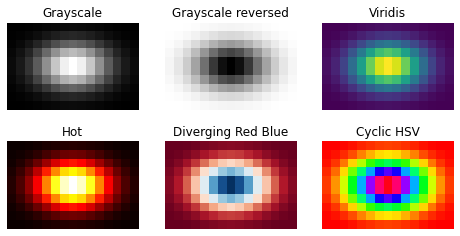

In [13]:
img = ((2**12-1)*np.exp(- (d**2 / (2.0*sigma**2) ) )).astype('uint16')

fig, ax = plt.subplots(2,3, figsize=(8,4))
(ax0, ax1, ax2, ax3, ax4, ax5) = ax.flatten()

ax0.imshow(img, cmap='gray')
ax0.set_title('Grayscale')
ax0.set_axis_off()

ax1.imshow(img, cmap='gray_r')
ax1.set_title('Grayscale reversed')
ax1.set_axis_off()

ax2.imshow(img, cmap='viridis')
ax2.set_title('Viridis')
ax2.set_axis_off()

ax3.imshow(img, cmap='hot')
ax3.set_title('Hot')
ax3.set_axis_off()

ax4.imshow(img, cmap='RdBu')
ax4.set_title('Diverging Red Blue')
ax4.set_axis_off()

ax5.imshow(img, cmap='hsv')
ax5.set_title('Cyclic HSV')
ax5.set_axis_off()

plt.show()

### Displaying Composite and Individual channels (RGB imaging)

The image (free from pixabay.com) of a cat is provided in the ./data folder. I followed the procedure posted in https://stackoverflow.com/questions/39885178/how-can-i-see-the-rgb-channels-of-a-given-image-with-python.

In [14]:
import skimage.io as io

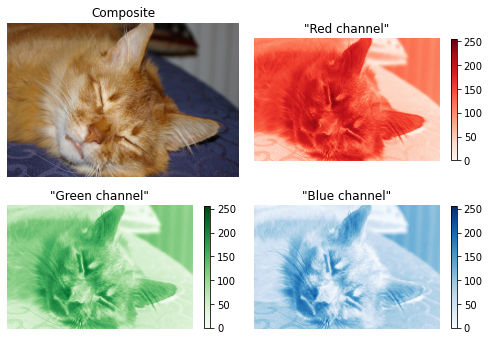

In [15]:
img = io.imread('./data/sleeping-cat.jpg')

# create red, green and blue channels
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

fig, axs = plt.subplots(2,2, figsize=(7,5))

plot0 = axs[0,0].imshow(img, cmap='Greys_r')
axs[0,0].set_axis_off()
axs[0,0].set_title('Composite')

plot1 = axs[0,1].imshow(red_channel, cmap='Reds')
fig.colorbar(plot1, ax=axs[0,1], shrink=0.77)
axs[0,1].set_axis_off()
axs[0,1].set_title('"Red channel"')

plot2 = axs[1,0].imshow(green_channel, cmap='Greens')
fig.colorbar(plot2, ax=axs[1,0], shrink=0.77)
axs[1,0].set_axis_off()
axs[1,0].set_title('"Green channel"')

plot3 = axs[1,1].imshow(blue_channel, cmap='Blues')
fig.colorbar(plot3, ax=axs[1,1], shrink=0.77)
axs[1,1].set_axis_off()
axs[1,1].set_title('"Blue channel"')

plt.tight_layout()
plt.show()

## Brain MRI imaging

Necessary libraries imported for task.

In [16]:
import requests
from zipfile import ZipFile, ZipInfo
from io import BytesIO
from nibabel import FileHolder
from nibabel.analyze import AnalyzeImage

Reading zip file MRI-Dataset *attention* in memory.

In [17]:
zipfile = requests.get('http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip')
zipstream = BytesIO(zipfile.content)
mri_archive = ZipFile(zipstream)

Visualization function

In [18]:
def mri_vis(mri_id='068', img_nmr=17):
    """
    Function that extracts an MRI image from in-memory zip archive and plots the selected scan.
    """
    
    filename = 'attention/functional/snffM00587_0'+mri_id
    hdr_file = filename+'.hdr'
    img_file = filename+'.img'
    
    hdr = BytesIO(mri_archive.open(hdr_file).read())
    img = BytesIO(mri_archive.open(img_file).read())
    
    mri_dict = {'header': FileHolder(fileobj=hdr), 
                'image': FileHolder(fileobj=img)}
    mri_scan= AnalyzeImage.from_file_map(mri_dict).get_fdata()
    
    fig = plt.figure(figsize=(4,3))
    plt.imshow(mri_scan[:,:,img_nmr])
    plt.title('MRI image of scan #'+mri_id+', slice #'+str(img_nmr))
    plt.colorbar(shrink=0.7)
    plt.axis('off')
    plt.show()
    

Examples

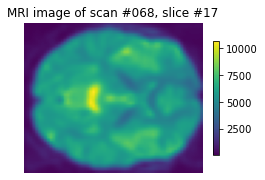

In [19]:
mri_vis()

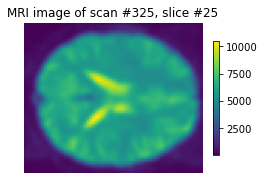

In [20]:
mri_vis('325',25)

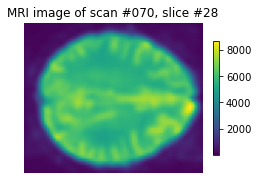

In [21]:
mri_vis('070',28)

## Geospatial Data Visualization

Importing necessary libraries

In [22]:
import geopandas as geopd
import geoplot as geopl
import geoplot.crs as gcrs
import mapclassify as mc

import warnings
warnings.filterwarnings('ignore')

### Working with geospatial files in geopandas

1: Importing the provided USA shape file, *cb_2018_us_state_500k.shp*, to GeoPandas.

2: Importing *us_state_est_poputaion.csv* from ./data as Pandas DataFrame. 

Head and summary of the two datasets is printed out. Their common key column is 'NAME'.

In [30]:
print('US Shape file')
us_shape = geopd.read_file("./data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
print(f'Number of rows: {us_shape.shape[0]}, Number of columns: {us_shape.shape[1]}')
us_shape.iloc[:3,:10]

US Shape file
Number of rows: 56, Number of columns: 10


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."


In [31]:
print('US Census dataset')
us_census = pd.read_csv('./data/us_state_est_population.csv')
print(f'Number of rows: {us_census.shape[0]}, Number of columns: {us_census.shape[1]}')
us_census.iloc[5:10,:8]

US Census dataset
Number of rows: 57, Number of columns: 136


,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010
5,40,3,6,1,Alabama,4779736,4780138,4785448
6,40,4,9,2,Alaska,710231,710249,713906
7,40,4,8,4,Arizona,6392017,6392288,6407774
8,40,3,7,5,Arkansas,2915918,2916028,2921978
9,40,4,9,6,California,37253956,37254523,37320903


3: Merging the two datasets by inner join. The mis-matching state enteties are discarded from the merge.

In [32]:
state_names = list(set(us_shape.NAME).intersection(set(us_census.NAME)))
print(f'Number of states in common in the datasets: {len(state_names)}')

diff_shape = list(set(us_shape.NAME).difference(state_names))
diff_census = list(set(us_census.NAME).difference(state_names))

print(f'State enteties only present in the US Shape dataset: {diff_shape}')
print(f'State enteties only present in the US Census dataset: {diff_census}')

Number of states in common in the datasets: 52
State enteties only present in the US Shape dataset: ['Guam', 'United States Virgin Islands', 'Commonwealth of the Northern Mariana Islands', 'American Samoa']
State enteties only present in the US Census dataset: ['United States', 'West Region', 'Midwest Region', 'South Region', 'Northeast Region']


In [33]:
us_data = us_shape.merge(us_census, on='NAME', how='inner')
print(f'Merged dataset\nNumber of rows: {us_data.shape[0]}, Number of columns: {us_data.shape[1]}')
us_data.iloc[:3,:10]

Merged dataset
Number of rows: 52, Number of columns: 145


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."


4: Plotting a shape of California

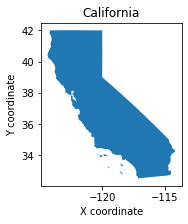

In [34]:
california = us_data[us_data['NAME']=='California']

fig = california.plot(figsize=(4,3))
plt.title('California')
plt.ylabel('Y coordinate')
plt.xlabel('X coordinate')
plt.show()

### Spatial data visualization with GeoPlot 

A new GeoDataFrame is created by loading a US sample dataset from geoplot and showing the state boundaries. Geospatial Data of different sort is created to compare different ways to visualize it in GeoPlot.

In [35]:
path = geopl.datasets.get_path("contiguous_usa")
us_contig = geopd.read_file(path)
us_contig.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


Loading a US Cities dataset.

In [36]:
path = geopl.datasets.get_path("usa_cities")
us_cities = geopd.read_file(path)
us_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


#### 1. Overplotting population and USA shape and adjusting point sizes. I have followed bits of the geoplot tutorial on Github: https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html

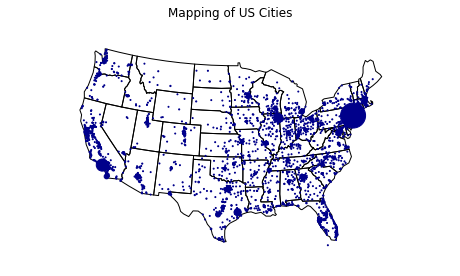

In [37]:
#cities on the mainland USA
cities = us_cities.query('STATE not in ["HI", "AK", "PR"]')

ax = geopl.polyplot(us_contig, projection=gcrs.AlbersEqualArea(), 
                    figsize=(8,5))

geopl.pointplot(cities, ax=ax, color='darkblue', 
                scale='POP_2010', limits=(1, 25))

plt.title('Mapping of US Cities', fontsize=12)
plt.show()

#### 2. US Cities colored by elevation on a Webmap

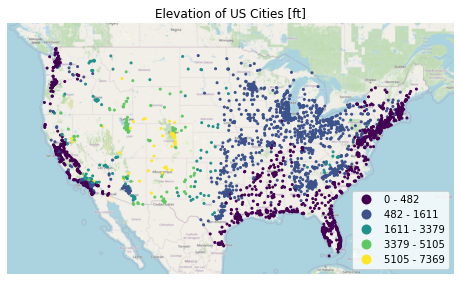

In [38]:
ax = geopl.webmap(us_contig, projection=gcrs.WebMercator(), figsize=(8,5))

geopl.pointplot(cities, ax=ax, hue='ELEV_IN_FT', 
                legend=True, scheme="FisherJenks", s=2)

plt.title('Elevation of US Cities [ft]', fontsize=12)
plt.show()

#### 3. Size and color mapping of cities by elevation

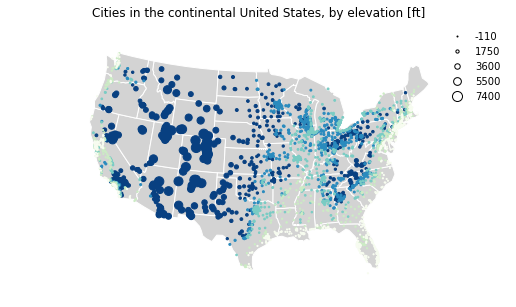

In [39]:
ax = geopl.polyplot(
     us_contig,
     linewidth=1,
     projection=gcrs.AlbersEqualArea(),
     edgecolor='white',
     facecolor='lightgray',
     figsize=(9, 6)
)

geopl.pointplot(
    cities,
    ax=ax,
    scale='ELEV_IN_FT',
    limits=(1, 10),
    hue='ELEV_IN_FT',
    cmap='GnBu',
    scheme="quantiles",
    legend=True,
    legend_var='scale',
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=['-110', '1750', '3600', '5500', '7400'],
    legend_kwargs={'frameon': False, 'loc': 'upper right'}
)

plt.title("Cities in the continental United States, by elevation [ft]", fontsize=12)
plt.show()

#### 4. Coloring States by Population

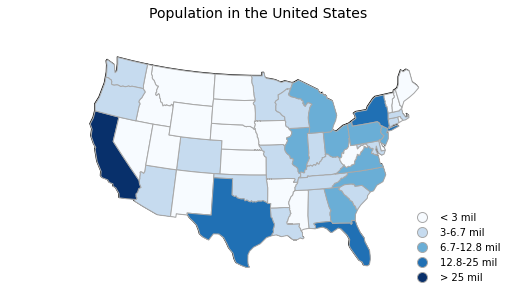

In [40]:
ax = geopl.polyplot(us_contig, 
                    projection=gcrs.AlbersEqualArea(),
                    figsize=(9,5))

geopl.choropleth(us_contig, 
                 ax=ax,
                 hue='population',
                 cmap='Blues',
                 linewidth=1, 
                 edgecolor='darkgray',
                 legend=True,
                 scheme="FisherJenks",
                 legend_labels=['< 3 mil','3-6.7 mil',
                                '6.7-12.8 mil','12.8-25 mil',
                                '> 25 mil'],
                 legend_kwargs={'frameon': False, 
                                'loc': 'lower right'}
)
plt.title('Population in the United States', fontsize=14)
plt.show()

#### 5. Polygon data on Obesity in the US

Opening Obesity data and joining to the USA spatial dataset.

In [41]:
us_obesity = pd.read_csv(geopl.get_path("obesity_by_state"), sep='\t')
print(f'Obesity dataset:\n{us_obesity.head(4)}...\n')

geo_obesity = us_contig.set_index('state').join(us_obesity.set_index('State'))
print(f'Joint Geo-Obesity dataset:\n')
geo_obesity.iloc[:4,:4]

Obesity dataset:
      State  Percent
0   Alabama     32.4
1  Missouri     30.4
2    Alaska     28.4
3   Montana     24.6...

Joint Geo-Obesity dataset:



,adm1_code,population,geometry,Percent
state,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6


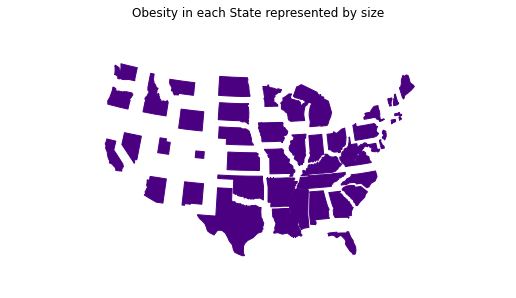

In [42]:
ax = geopl.cartogram(geo_obesity, figsize=(9,5), scale='Percent', 
                     projection=gcrs.AlbersEqualArea(), color='indigo')

plt.title('Obesity in each State represented by size')
plt.show()

#### 6. Visualizing US Cities in 10 quantiles

To plot the elevation values in the US *cities* the scheme for pointplot is changed to include 10 quantiles. To create a legend array - the elevation values are sorted and split into 10 quantiles. The boundary values from *s* above are saved in a new legend list.

In [44]:
s = mc.Quantiles(cities['ELEV_IN_FT'], k=10)
print(s)

cities_sort = cities.ELEV_IN_FT.sort_values()
legend_list = [int(np.quantile(cities_sort,q)) for q in np.arange(0.1, 1.1, 0.1)]
legend_labels = [str(x) for x in legend_list]
print(f'\nLegend values: {legend_list}')

Quantiles                 

     Interval        Count
--------------------------
[-112.00,   26.00] |   382
(  26.00,   72.00] |   351
(  72.00,  157.00] |   362
( 157.00,  328.00] |   353
( 328.00,  528.00] |   366
( 528.00,  646.00] |   359
( 646.00,  778.00] |   359
( 778.00,  948.00] |   363
( 948.00, 1310.50] |   359
(1310.50, 7369.00] |   362

Legend values: [26, 72, 157, 328, 528, 646, 778, 948, 1310, 7369]


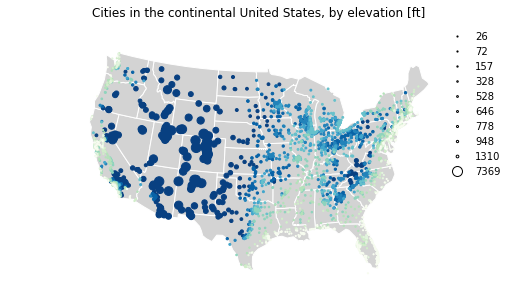

In [45]:
ax = geopl.polyplot(
     us_contig,
     linewidth=1,
     projection=gcrs.AlbersEqualArea(),
     edgecolor='white',
     facecolor='lightgray',
     figsize=(9, 6)
)

geopl.pointplot(
    cities,
    ax=ax,
    scale='ELEV_IN_FT',
    limits=(1, 10),
    hue='ELEV_IN_FT',
    cmap='GnBu',
    scheme=s,
    legend=True,
    legend_values=legend_list,
    legend_labels=legend_labels,
    legend_var='scale',
    legend_kwargs={'frameon': False, 'loc': 'upper right'}
)

plt.title("Cities in the continental United States, by elevation [ft]")
plt.show()

#### 7. Elevation plot Voronoi diagram

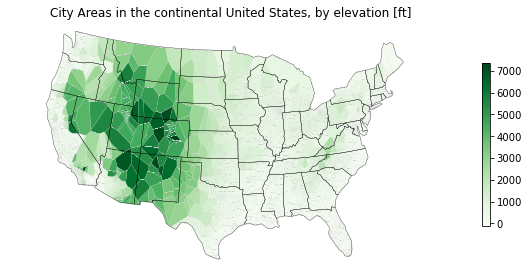

In [46]:
# solving duplication problem
citiesNoDup = cities.drop_duplicates(subset='geometry') 

ax = geopl.voronoi(citiesNoDup, hue="ELEV_IN_FT", clip=us_contig,
                   projection=geopl.crs.AlbersEqualArea(),
                   cmap='Greens', legend=True, legend_kwargs={'shrink': 0.5},
                   edgecolor='lightgrey', linewidth=0.1, figsize=(10,6)
)

geopl.polyplot(us_contig, ax=ax, extent=us_contig.total_bounds,
               edgecolor='black', linewidth=0.3, zorder=1
)

plt.title("City Areas in the continental United States, by elevation [ft]")
plt.show()

### Voronoi diagram of primary schools in Melbourne, Australia

Reading Melbourne data. Inspiration from https://residentmario.github.io/geoplot/gallery/plot_melbourne_schools.html.

In [47]:
melb = geopd.read_file(geopl.datasets.get_path("melbourne"))
melb_df = geopd.read_file(geopl.datasets.get_path("melbourne_schools"))
melb_schools = melb_df.query('School_Type == "Primary"')

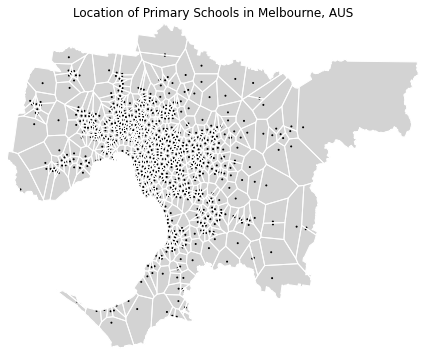

In [48]:
ax = geopl.voronoi(melb_schools, clip=melb, 
                   projection=gcrs.Mercator(), edgecolor='w')
    
geopl.polyplot(melb, ax=ax, edgecolor='None',
               facecolor='lightgray')
    
geopl.pointplot(melb_schools, ax=ax, extent=melb.total_bounds, 
                s=1, color='black')
plt.title('Location of Primary Schools in Melbourne, AUS')
plt.show()

### Voronoi diagram of elevation in US Cities

Inspiration taken from https://towardsdatascience.com/visualizing-geospatial-data-in-python-e070374fe621

## Covid-19 Data Animations

### 1. Covid-19 Confirmed Cases

Importing additional libraries

In [49]:
import pycountry
import plotly.express as ex

Loading and cleaning *time_series_covid19_confirmed_global.csv*.

In [50]:
def get_country_code(name):
    """
    Function that extracts the three letter country code for each country
    """
    try: 
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

In [51]:
filepath = './data/time_series_covid19_confirmed_global.csv'
covid_conf = pd.read_csv(filepath).drop(columns=['Province/State', 
                                                 'Lat', 
                                                 'Long'])

covid_agg = covid_conf.groupby('Country/Region').agg('sum')
date_list = list(covid_agg.columns)
covid_agg['country'] = covid_agg.index
covid_agg['iso_alpha_3'] =covid_agg.country.apply(get_country_code)

covid_df = pd.melt(covid_agg, 
                   id_vars=['country', 'iso_alpha_3'], 
                   value_vars=date_list)

print(f'Built Covid-19 confirmed DataFrame:\n{covid_df}')

Built Covid-19 confirmed DataFrame:
                  country iso_alpha_3 variable  value
0             Afghanistan         AFG  1/22/20      0
1                 Albania         ALB  1/22/20      0
2                 Algeria         DZA  1/22/20      0
3                 Andorra         AND  1/22/20      0
4                  Angola         AGO  1/22/20      0
...                   ...         ...      ...    ...
55665  West Bank and Gaza        None  11/9/20  58838
55666      Western Sahara         ESH  11/9/20     10
55667               Yemen         YEM  11/9/20   2071
55668              Zambia         ZMB  11/9/20  16971
55669            Zimbabwe         ZWE  11/9/20   8561

[55670 rows x 4 columns]


Creating Plotly Express Map

In [52]:
print('Confirmed Covid-19 Cases printed to "covid19_map.html"')
fig = ex.choropleth(covid_df, locations='iso_alpha_3', color='value',
                   hover_name='country', animation_frame='variable',
                   projection='natural earth',
                   color_continuous_scale='Peach',
                   range_color=[0, 50000])
fig.write_html("covid19_map.html")

Confirmed Covid-19 Cases printed to "covid19_map.html"


### 2. Covid-19 Recovered Cases

In [53]:
filepath = './data/time_series_covid19_recovered_global.csv'
covid_rec = pd.read_csv(filepath).drop(columns=['Province/State', 
                                                 'Lat', 
                                                 'Long'])

covid_agg = covid_rec.groupby('Country/Region').agg('sum')
date_list = list(covid_agg.columns)
covid_agg['country'] = covid_agg.index
covid_agg['iso_alpha_3'] =covid_agg.country.apply(get_country_code)

covid_df = pd.melt(covid_agg, 
                   id_vars=['country', 'iso_alpha_3'], 
                   value_vars=date_list)

print('Recovered Cases Covid-19 printed to "covid19_recover.html"')
fig = ex.choropleth(covid_df, locations='iso_alpha_3', color='value',
                   hover_name='country', animation_frame='variable',
                   projection='natural earth',
                   color_continuous_scale='teal',
                   range_color=[0, 50000])

fig.write_html("covid19_recover.html")

Recovered Cases Covid-19 printed to "covid19_recover.html"


### 3. Deaths by Covid-19

In [54]:
filepath = './data/time_series_covid19_deaths_global.csv'
covid_dead = pd.read_csv(filepath).drop(columns=['Province/State', 
                                                 'Lat', 
                                                 'Long'])

covid_agg = covid_dead.groupby('Country/Region').agg('sum')
date_list = list(covid_agg.columns)
covid_agg['country'] = covid_agg.index
covid_agg['iso_alpha_3'] =covid_agg.country.apply(get_country_code)

covid_df = pd.melt(covid_agg, 
                   id_vars=['country', 'iso_alpha_3'], 
                   value_vars=date_list)

print('Deaths by Covid-19 printed to "covid19_death.html"')
fig = ex.choropleth(covid_df, locations='iso_alpha_3', color='value',
                   hover_name='country', animation_frame='variable',
                   projection='natural earth',
                   color_continuous_scale='blackbody_r',
                   range_color=[0, 50000])

fig.write_html("covid19_death.html")

Deaths by Covid-19 printed to "covid19_death.html"


****
END